In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(torch.__version__)
print(torchvision.__version__)
# Check compatibility

2.0.1+cu117
0.15.2+cu117


In [2]:
train_data = torchvision.datasets.FashionMNIST(root='G:/py-py-py-pytorch/cnn/data/',train=True,
                                               download=True,
                                               transform=transforms.Compose([transforms.ToTensor()])
                                               )
#without transforms, the torchvision returns PIL image
# ToTensor() returns a normalized tensor between range(0.0, and 1.0)

In [9]:
# image_1 = train_data[10][0][0]
# plt.imshow(image_1)

In [3]:
train_loader = DataLoader(train_data, batch_size = 16)

In [16]:
torch.set_printoptions(linewidth=100)

In [4]:
print(len(train_data))
print(train_data.targets)
print(train_data.targets.bincount())

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


In [11]:
train_it = iter(train_data)
type(train_it)

sample = next(train_it)
#print(sample)
print(len(sample))
print(type(sample))

2
<class 'tuple'>


In [12]:
img, label = sample #sequence unpacking / deconstructing object 

In [13]:
img.shape

torch.Size([1, 28, 28])

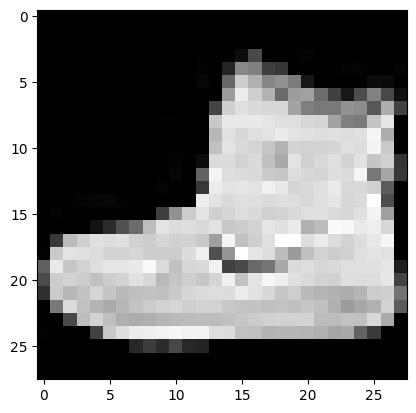

In [21]:
plt.imshow(img.squeeze(),cmap='gray')
plt.show()

In [24]:
loader_it = iter(train_loader)
batch = next(loader_it)
print(batch)


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [25]:
imgs, labels = batch

In [26]:
imgs.shape

torch.Size([16, 1, 28, 28])

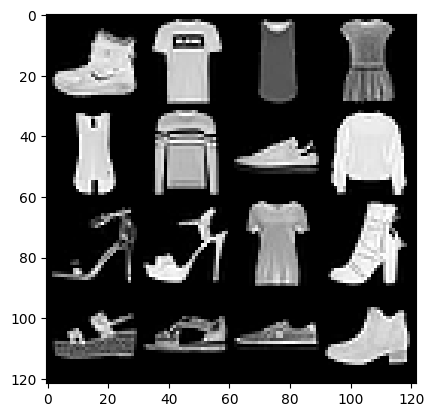

In [33]:
grid = torchvision.utils.make_grid(imgs,nrow=4)
# grid.shape
grid = grid.permute(1,2,0)

plt.imshow(grid)

In [4]:
# Dummy Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=3)

        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
    
    # def __repr__(self):
    #     return "A Neural Network"
    
    def forward(self, t):
        
        return t

In [5]:
network = NeuralNetwork()
network

NeuralNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [17]:
print(network.conv1,"\n")
print(network.conv1.weight.shape,"\n")
print("The first parameter '6' refers to the no. of filters\nThe second parameter '1' refers to the depth of the filters (color channels)")
print("The third and fourth paramters refer to the height and width of the kernel (3,3)")


Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1)) 

torch.Size([6, 1, 3, 3]) 

The first parameter '6' refers to the no. of filters
The second parameter '1' refers to the depth of the filters (color channels)
The third and fourth paramters refer to the height and width of the kernel (3,3)


In [18]:
print(network.fc1.weight.shape)

torch.Size([120, 192])
